# Проект: приоритизация гипотез, проведение A/B-теста

**Цель проекта** 

Провести приоритизацию подготовленных гипотез для увеличения выручки интернет магазина, запустить A/B-тест.

**План работ**
- Обзор данных
- Предобработка данных 
- Приоритезация гипотез
- Анализ А/В-теста;

## Обзор данных

###  Импорт библиотек

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt

from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', False)

###  Загрузка данных

In [2]:
#загрузка данных
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv') 
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

### Описание данных



Структура `hypothesis.csv`:
- **Hypothesis** — краткое описание гипотезы;
- **Reach** — охват пользователей по 10-балльной шкале;
- **Impact** — влияние на пользователей по 10-балльной шкале;
- **Confidence** — уверенность в гипотезе по 10-балльной шкале;
- **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.



Структура `orders.csv`:
- **transactionId** — идентификатор заказа;
- **visitorId** — идентификатор пользователя, совершившего заказ;
- **date** — дата, когда был совершён заказ;
- **revenue** - выручка заказа;
- **group** - группа A/B-теста, в которую попал заказ.


Структура `visitors.csv`:
- **date** — date — дата;

- **group** — группа A/B-теста;
- **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста



In [3]:
#вывод первых строк (гипотезы)
display(hypothesis.head(10))
#вывод основной информации 

hypothesis.info()


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
#вывод первых строк orders
display(orders.head(10))
#вывод основной информации 
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [5]:
#вывод первых строк visitors
display(visitors.head(10))
#вывод основной информации 
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


### Вывод

Предоставлены следующие датасеты:
- с гипотезами (hypothesis) по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
- с заказами (orders), где заказы разделены на группы A/B-теста
- с группами (visitors) А/В теста с количеством пользователей в указанную дату в указанной группе.

В датафрейме hypothesis не соблюден общий стиль названий столбцов. Тип данных в orders и visitors в столбцах с датами нужно преобразовать в datetime. Устраним это перед продолжением работы.

## Предобработка данных

**Приведем названия столбцов к общепринятому стилю**

In [6]:
#приводим к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


**Изменим тип данных для столбцов с датами**

In [7]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**Обработка пропусков и дубликатов**

**Проверим на пропуски**

In [8]:
display(hypothesis.isna().sum(),
orders.isna().sum())
visitors.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

**Проверим на явные дубликаты**

In [9]:
display(hypothesis.duplicated().sum(),
orders.duplicated().sum())
visitors.duplicated().sum()

0

0

0

### Вывод

В ходе предобработки стиль названий столбцов исправлен.
Дубликаты и пропуски не обнаружены.

## Часть 1. Приоритизация гипотез.


Приоритизируем сформулированные гипотезы из датасета `hypothesis`. Приоритизацию проведем с помощью фреймворков ICE и RICE, т.к. они фокусируются на ключевых аспектах, таких как влияние, уверенность и охват, что помогает быстро выявить наиболее перспективные гипотезы без необходимости углубленного изучения каждой отдельно.

**Посчитаем ICE для гипотез.**

In [10]:
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts'],2)

hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Самые перспективные гипотезы под индексами 8,0,7,6

**Посчитаем RICE для гипотез.**

In [11]:
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Самые перспективные гипотезы под индексами 7,2,0,6

In [12]:
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


### Вывод

При применении ICE перспективные гипотезы можно считать под индексами 8,0,7,6. 
Далее мы добавили в расчет охват пользователей и применили фреймворк RICE. В этом случае самые перспективные гипотезы под индексами 7,2,0,6.
Приоритизация гипотез при применении RICE изменилась из-за параметра reach, который отображает скольких пользователей коснется изменение. В гипотезе под № 7 он имеет наибольшее значение по сравнению с другими. Ее стоит проверить в первую очередь. 

## Часть 2. Анализ A/B-теста

**Проверка кумулятивных данных**

Построим график **кумулятивной выручки по группам**.
Чтобы построить графики,соберем кумулятивные данные. Объявим датафрейм cumulativeData. 

In [13]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (
    datesGroups
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
           .agg({'date' : 'max','group' : 'max', 'transactionId' : 'nunique','visitorId' : 'nunique','revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'])
)

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (
    datesGroups
    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
           .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
               .sort_values(by=['date','group'])
)

# объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
# переименовываем столбцы
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Строим график кумулятивной выручки по группам

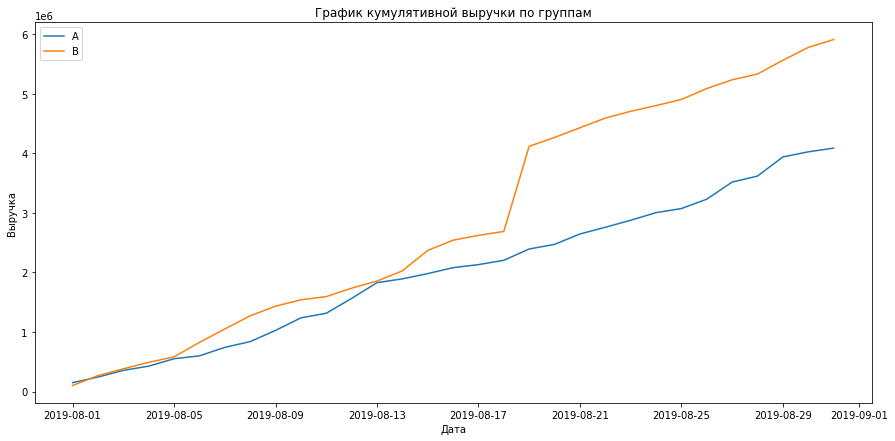

In [14]:

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(15,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.legend()

plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')

plt.show()





**Вывод**


Выручка в группе А увеличивалась равномерно в течении всего теста. В группе В произошел резкий скачок после 17.08.2019. Его причину проверим дальше. Так же стоит отметить, что в целом выручка группы А ниже, чем группы В.

Построим график **кумулятивного среднего чека по группам**.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

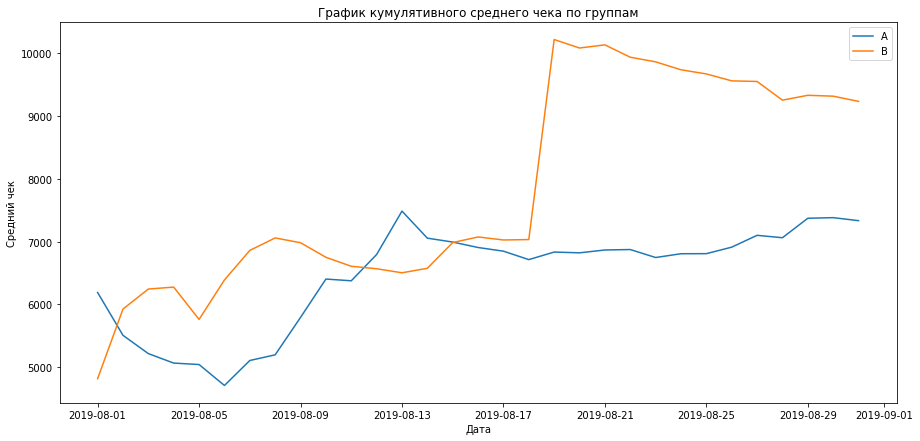

In [15]:
plt.figure(figsize=(15,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')

plt.show()


**Вывод**

В группе А средний чек стал равномерным к концу теста начиная с 13.08.2019. В группе В виден резкий скачок, возможно это связано с аномально крупным заказом.

Построим график **относительного изменения кумулятивного среднего чека группы B к группе A**.

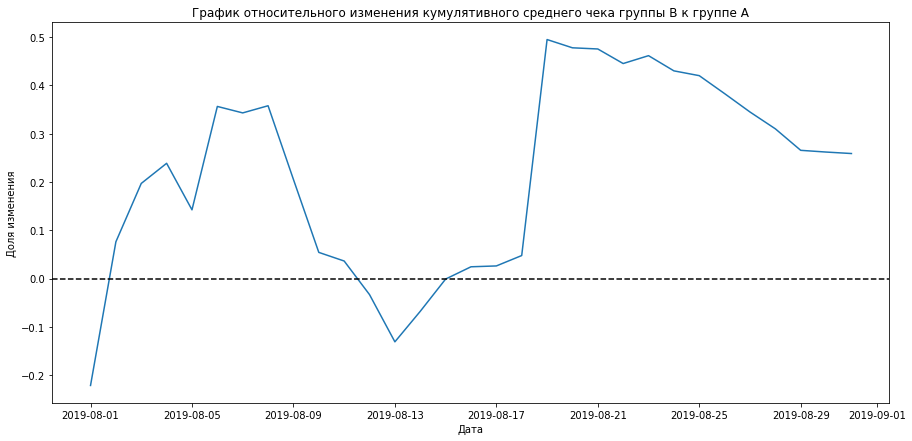

In [16]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)


# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Доля изменения')
plt.xlabel('Дата')

plt.show()

**Вывод**

Сначала средний чек группы B стабильно растет, потом резко падает и снова растет. Возможно это результат аномально больших заказов.


Построим график **кумулятивного среднего количества заказов на посетителя по группам**.

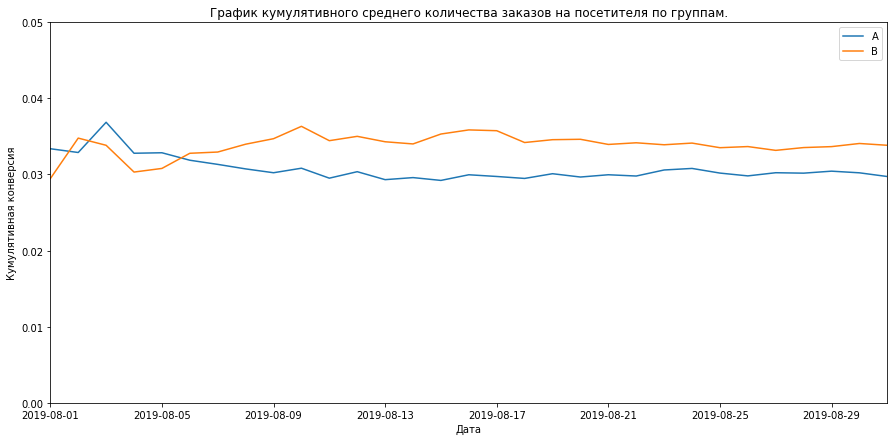

In [17]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики

plt.figure(figsize=(15,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
#plt.xticks(rotation=30)
plt.legend()

plt.title('График кумулятивного среднего количества заказов на посетителя по группам.')
plt.ylabel('Кумулятивная конверсия')
plt.xlabel('Дата')
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])

plt.show()



**Вывод**

В начале теста были колебания в конверсии. Конверсия группы А была выше, но после 05.08.2019 ситуация изменилась. Конверсия группы В стала выше и зафиксировалась около одного значения.

Построим график **относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A**.

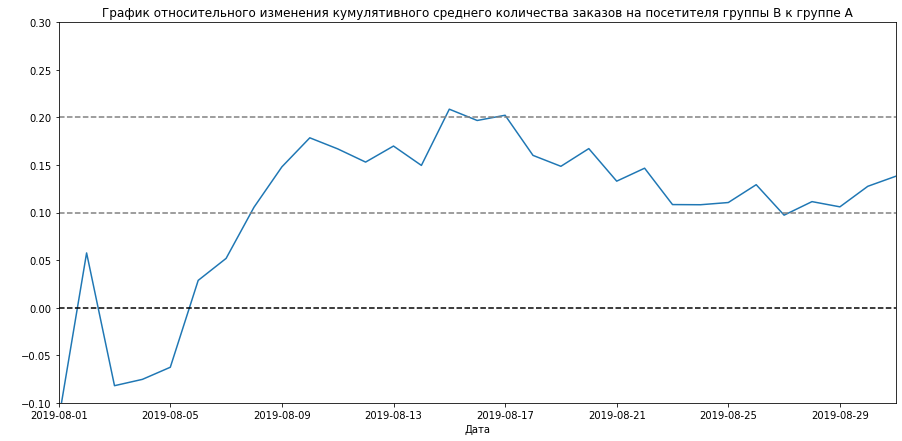

In [18]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")


plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.ylabel(' ')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.1, 0.3])

plt.show()


**Вывод**

До 5 августа 2019 года количество заказов в группе В менялось, но в основном было меньше, чем в группе А. Затем произошло резкое увеличение, после которого среднее количество заказов в группе В не опускалось ниже 10%, относительно группы А.

Построим **точечный график количества заказов по пользователям**.

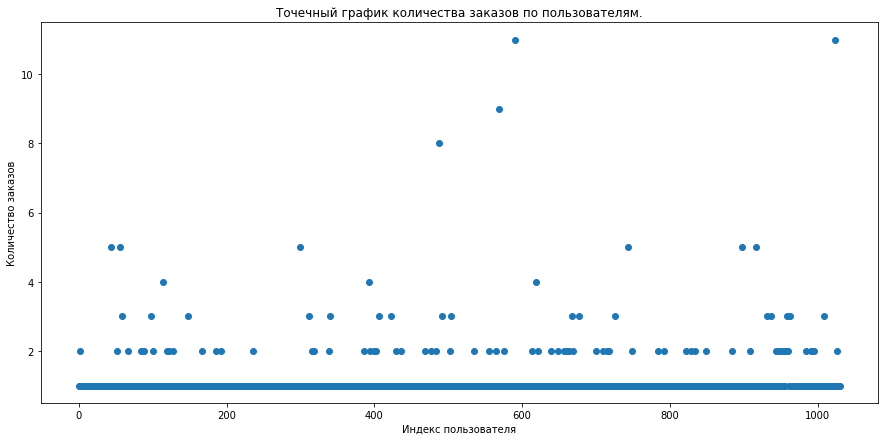

In [19]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,7))
plt.scatter(x_values, ordersByUsers['orders'])


plt.title('Точечный график количества заказов по пользователям.')
plt.ylabel('Количество заказов')
plt.xlabel('Индекс пользователя')
plt.show()

Болинство делает 1 заказ. Точная доля остальных заказов не ясна, чтобы ее определить посчитаем выборочные перцентили количества заказов на одного пользователя. Чтобы определить границу для определения аномальных пользователей.

In [20]:
#считаем перцентили
percentile95 = np.percentile(ordersByUsers['orders'], [95])
percentile99 = np.percentile(ordersByUsers['orders'], [99])
print(f'Не более 5% пользователей офорляли больше, чем {percentile95} заказа')
print(f'Не более 1% пользователей офорляли больше, чем {percentile99} заказа')

Не более 5% пользователей офорляли больше, чем [2.] заказа
Не более 1% пользователей офорляли больше, чем [4.] заказа


Выберем границу в 2 заказа, по 95 перцентилю. Остальных пользователей примем за аномальных.

Построим **точечный график стоимостей заказов**. 

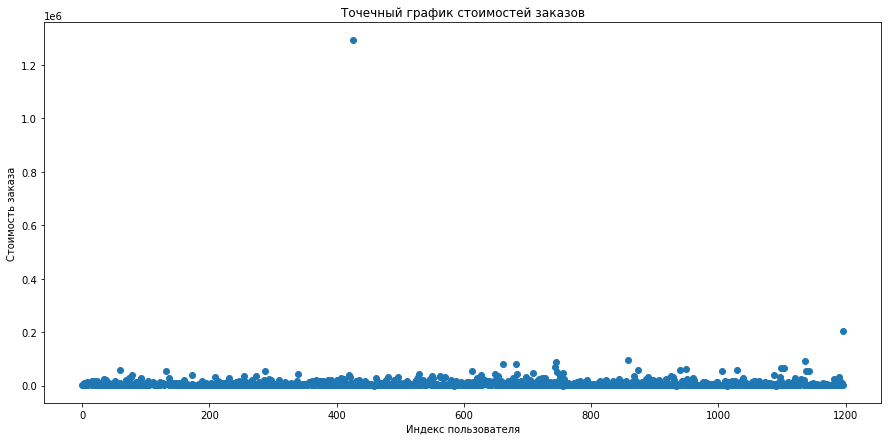

In [21]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,7))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Индекс пользователя')
plt.show()



Видны явно выбивающиеся значения. Для стоимости заказов так же посчитаем перцентили, чтобы отсеять аномалии.

In [22]:
#считаем перцентили
percentile95 = np.percentile(orders['revenue'], [95])
percentile99 = np.percentile(orders['revenue'], [99])
print(f'Не более 5% заказов дороже, чем {percentile95} ')
print(f'Не более 1% заказов дороже, чем {percentile99} ')

Не более 5% заказов дороже, чем [28000.] 
Не более 1% заказов дороже, чем [58233.2] 


Выберем границу в 28000, остальных пользователей примем за аномальных.

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами без удаления аномальных пользователей.
Сформулируем гипотезы: 

$H_{0}$ - различий в среднем количестве заказов между группами нет

$H_{1}$ - различия в среднем количестве заказов между группами есть.

Установим уровень статистической значимости = 0.05

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

In [23]:

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01  24              148579           21               
1 2019-08-02  20              93822            24               
2 2019-08-03  24              112473           16               
3 2019-08-04  16              70825            17               
4 2019-08-05  25              124218           23               

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0  101217           24                  148579                
1  165531           44                  242401                
2  114248           68                  354874                
3  108571           84                  425699                
4  92428            109                 549917                

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0  21                  101217               719                
1  45                  266748               619                
2  61                  380996         

Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `userId` `orders`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [24]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [25]:
alpha = 0.05
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-значение:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост среднего числа заказов группы B:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


if stats.mannwhitneyu(sampleA, sampleB)[1] < alpha:
    print('Отвергаем нулевую гипотезу: между группами есть разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 0.017
Относительный прирост среднего числа заказов группы B: 0.138
Отвергаем нулевую гипотезу: между группами есть разница


Теперь проверим статистическую значимость различий в среднем чеке между сегментами.
Сформулируем гипотезы: 

$H_{0}$ - различий в среднем чеке между группами нет.

$H_{1}$ - различия в среднем чеке между группами есть.

Установим уровень статистической значимости = 0.05
Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. 

In [26]:
alpha = 0.05
print(
    'p-значение:','{0:.3f}'
    .format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                               orders[orders['group']=='B']['revenue'])[1])
)

print(
    'Относительный прирост среднего чека группы B:', '{0:.3f}'
    .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue']
            .mean()-1)
)

if stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                               orders[orders['group']=='B']['revenue'])[1] < alpha:
    print('Отвергаем нулевую гипотезу: между группами есть разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.729
Относительный прирост среднего чека группы B: 0.259
Не получилось отвергнуть нулевую гипотезу


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

Если p-value > alpha значит средний чек группы B **равен** среднему чеку группы A (или не отличается). Наблюдаемое различие не значимо, получено случайно из-за единичных выбросов.

Далее посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28000.

In [27]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)


print('Количество аномальных пользователей:',len(abnormalUsers))
print('Доля аномальных пользователей {:.2%}'.format(len(abnormalUsers) / len(orders['visitorId'].unique())))

Количество аномальных пользователей: 74
Доля аномальных пользователей 7.18%


Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:


In [28]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

Сформулируем гипотезы: 

$H_{0}$ - различий в среднем количестве заказов между группами нет

$H_{1}$ - различия в среднем количестве заказов между группами есть.

Установим уровень статистической значимости = 0.05

In [29]:
print('p-значение:',"{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print('Относительный прирост среднего числа заказов группы B:', "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


if stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] < 0.05:
    print('Отвергаем нулевую гипотезу: между группами есть разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.013
Относительный прирост среднего числа заказов группы B: 0.173
Отвергаем нулевую гипотезу: между группами есть разница


Результаты по среднему количеству заказов практически не изменились. Разница между группами есть, а относительный прирост среднего числа заказов группы B к группе А составляет 14,8%, что больше чем в данных с выбросами.

 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

$H_{0}$ - различий в среднем чеке между группами нет.

$H_{1}$ - различия в среднем чеке между группами есть.

Установим уровень статистической значимости = 0.05

In [30]:
print(
    'p-значение:','{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительный прирост среднего чека группы B:',"{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

if stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1] < 0.05:
     print('Отвергаем нулевую гипотезу: между группами есть разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    

p-значение: 0.738
Относительный прирост среднего чека группы B: -0.020
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, различий в среднем чеке между группами нет. Но без выбросов относительный прирост среднего чека группы В к группе А ниже на 2%, в то время как по не очищенным данным прирост среднего чека группы B составил 25%. наблюдаем сильное влияние аномалий

## **Вывод**

Перед проведением А/В теста стояла задача выбрать наиболее перспективную гипотезу для увеличения выручки интернет-магазина. Приоритизацию проводили с помощью фреймворков ICE и RICE. Результаты были различны, т.к. ICE не учитывает охват пользователей, принято решение отдать предпочтение результатам RICE и наиболее перспективной можно считать гипотезу: **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**

В ходе A/B-теста были получены следующие результаты:

- Обнаружено статистически значимое различие по конверсии между группами как на сырых, так и после фильтрации аномалий.

- Статистически значимого различия по среднему чеку между группами на сырых данных не наблюдалось, как и после фильтрации аномалий.

- График различия в конверсии между группами свидетельствует о том, что группа B показала лучшие результаты по сравнению с группой A: к концу тестирования показатели в группе B установились около среднего значения и превысили результаты группы A.

На основании этих данных можно сделать вывод, что группа B превосходит группу A, и поэтому тест следует завершить, остановив его на данном этапе.